## Data Product with Machine Learning
The task is to build a data product that will help users in the USA to better estimate their local travel airfare. Users will be able to provide details of their trip and the app will predict the expected flight fare.
We used `MSE and MAE` as the metric for the model performance.

`Author`: Wongwara Wijara 14191732

## Table of Content
Starting with regression approaches, we will use the following models:
1. Get Baseline model
2. Decision Tree
3. XGBoost regressor(default)
4. XGBoost regressor(Gridsearch)
5. Adaboost

## Import dataset for train model

In [1]:
import sys
import pandas as pd 
sys.path.insert(0, '../../src')

In [2]:
from data.make_dataset import load_sets
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../../data/processed/')

In [3]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((8111999, 12),
 (8111999,),
 (2704000, 12),
 (2704000,),
 (2704000, 12),
 (2704000,))

## Get Baseline Model

In [5]:
from models.null import NullRegressor
base_model = NullRegressor()
y_base = base_model.fit_predict(y_train)
from models.predict_model import print_regressor_scores
print_regressor_scores(y_preds=y_base, y_actuals=y_train, set_name='Training')

MSE Training: 1.0008648851928268
MAE Training: 0.7466010716968183
R2_score Training: 0.0


MSE for baseline model = 1 with R2 score = 0

## Modelling
Starting with regression approaches, we will use the following models:

1. Decision Tree Regression
2. XGBoost Regression (default)
3. XGBoost Regression (Gridsearch)
4. Adaboost Regressor

## DecisionTree

## Decision Tree Regression
Decision Tree Regression is a non-linear regression algorithm that models data as a tree-like structure of decisions and outcomes. It partitions the feature space into regions and assigns a constant value to each region, making it suitable for capturing complex relationships in the data.

### Why Decision Tree Regression for fare precition?

1. **Non-linearity:**  Decision trees can capture non-linear relationships between input features and the target variable. In the case of fare prediction, factors influencing the fare may not follow a simple linear pattern, and decision trees can model complex relationships.
2. **Interpretability:** Decision trees are inherently interpretable, allowing you to visualize and understand how the model makes predictions. This can be beneficial for stakeholders who require transparency.
3. **Handling Categorical Data:** Decision trees can handle both categorical and numerical data, making them versatile for various fare prediction tasks.
In the following sections, we will build a Decision Tree Regression model using the selected features to predict total fare. We will analyze the tree structure and assess its performance on the dataset.

In [6]:
# Decsion Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [7]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_tree = tree.predict(X_train)

# Model evaluation for val set
y_val_preds_tree = tree.predict(X_val)
print_regressor_scores(y_preds=y_train_preds_tree, y_actuals=y_train, set_name='Training')

MSE Training: 0.514622234165927
MAE Training: 0.5156166134098837
R2_score Training: 0.485822


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE for the training set
mse_train_tree = mean_squared_error(y_train, y_train_preds_tree)
mae_train_tree = mean_absolute_error(y_train, y_train_preds_tree)

# Calculate MSE and MAE for the validation set
mse_val_tree = mean_squared_error(y_val, y_val_preds_tree)
mae_val_tree = mean_absolute_error(y_val, y_val_preds_tree)

The training data's MSE is around 0.514. This means that the model's predictions have an average inaccuracy of 0.514 units on the same scale as target variable. Because a lower MSE indicates superior model performance, a lower number is prefered.

The MAE on the training data is approximately 0.515. This means that, on average, the model's predictions have an absolute error of about 0.515 units

In [8]:
print_regressor_scores(y_preds=y_val_preds_tree, y_actuals=y_val, set_name='Validation')

MSE Validation: 0.513727370515103
MAE Validation: 0.5154562182257849
R2_score Validation: 0.484277


The validation data's MSE is around 0.513. This means that the model's predictions have an average inaccuracy of 0.513 units on the same scale as target variable. Because a lower MSE indicates superior model performance, a lower number is prefered.

the MAE on the validation data is approximately 0.515. This means that, on average, the model's predictions have an absolute error of about 0.515 units

In [9]:
from joblib import dump
dump(tree,  '../../src/models/regression/decision_tree.joblib')

['../../src/models/regression/decision_tree.joblib']

## XGBoost Regression

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm known for its exceptional predictive accuracy and ability to handle complex datasets. It is a gradient boosting algorithm that combines multiple decision trees to make robust predictions. XGBoost has gained popularity in various fields due to its efficiency and effectiveness.

### Why XGBoost for fare Prediction?

When it comes to predicting total fare, XGBoost offers several advantages:

1. **High Predictive Accuracy:** XGBoost excels in capturing intricate patterns and relationships within the data, making it highly accurate in fare prediction. It can handle both linear and nonlinear dependencies effectively.

2. **Reduced Overfitting:** XGBoost incorporates techniques like regularization and early stopping, which help prevent overfitting. This ensures that the model generalizes well to unseen data, crucial for fare forecasting.

3. **Feature Importance:** XGBoost provides feature importance scores, allowing us to understand which factors (features) have the most significant impact on fare. This insight can be valuable for decision-making and business strategy.

4. **Flexibility:** XGBoost can handle a wide range of data types, including numeric and categorical features, making it suitable for diverse fare prediction scenarios.

In the following sections, we will build an XGBoost regression model using selected features to predict total fare accurately. We will explore the model's performance and feature importance to gain insights into the factors influencing fare.

In [10]:
from xgboost import XGBRegressor

In [11]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_xgb = xgb.predict(X_train)

# Model evaluation for validation set
y_val_preds_xgb = xgb.predict(X_val)

In [12]:
print_regressor_scores(y_preds=y_train_preds_xgb, y_actuals=y_train, set_name='Training')

MSE Training: 0.30150863525581
MAE Training: 0.36939060436361343
R2_score Training: 0.698752


The training data's MSE is around 0.3015. This means that the model's predictions have an average inaccuracy of 0.3015 units on the same scale as target variable. Because a lower MSE indicates superior model performance, a lower number is prefered.

The MAE on the training data is approximately 0.3693. This means that, on average, the model's predictions have an absolute error of about 0.3693 units

In [13]:
print_regressor_scores(y_preds=y_val_preds_xgb, y_actuals=y_val, set_name='Validation')

MSE Validation: 0.3011148881314104
MAE Validation: 0.36929267728464793
R2_score Validation: 0.697715


In [38]:
# Calculate MSE and MAE for the training set
mse_train_xgb = mean_squared_error(y_train, y_train_preds_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_train_preds_xgb)

# Calculate MSE and MAE for the validation set
mse_val_xgb = mean_squared_error(y_val, y_val_preds_xgb)
mae_val_xgb = mean_absolute_error(y_val, y_val_preds_xgb)

The training data's MSE is around 0.3011. This means that the model's predictions have an average inaccuracy of 0.3011 units on the same scale as target variable. Because a lower MSE indicates superior model performance, a lower number is prefered.

The MAE on the training data is approximately 0.3692. This means that, on average, the model's predictions have an absolute error of about 0.3692 units

## Model results between XGBoost and decision tree

Xgboost is better than decision tree with less mse score

In [14]:
# Model evaluation for validation set
y_test_preds_xgb = xgb.predict(X_test)

In [15]:
print_regressor_scores(y_preds=y_test_preds_xgb, y_actuals=y_test, set_name='Validation')

MSE Validation: 0.3010264501791764
MAE Validation: 0.3695336576220936
R2_score Validation: 0.699357


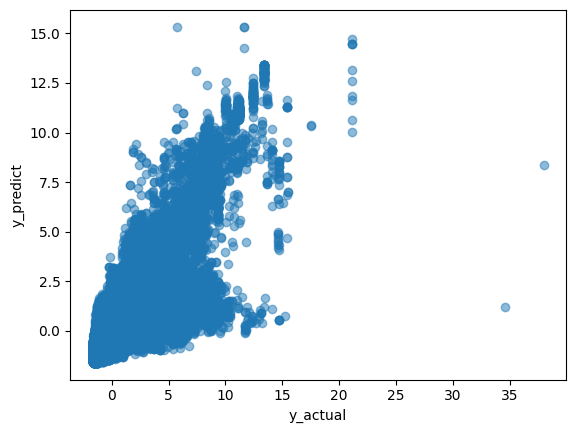

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test_preds_xgb, alpha = 0.5)
plt.xlabel("y_actual")
plt.ylabel("y_predict")
plt.show()

The MSE test calculates the average magnitude of the differences between anticipated and actual values. An MSE of about 0.3010 in this situation indicates that, on average, the predictions provided by the XGBoost have an inaccuracy of around 0.3010 units when compared to the actual target values in the test set. Lower MSE values imply that the model is performing better.

The MAE test calculates the average absolute difference between anticipated and actual values. With an MAE of about 0.3695, it signifies that the model's predictions have an absolute error of about 0.3695 units on average when compared to the actual target values in the test set. Lower MAE values, like MSE, indicate greater model performance.

In [18]:
from joblib import dump

In [19]:
dump(xgb,  '../../src/models/regression/xgb_default.joblib')

['../../src/models/regression/xgb_default.joblib']

## GridSearch

These hyperparameters were chosen based on common practices and considerations for XGBoost regression models

- n_estimators: [100, 200, 300] - The number of boosting rounds or trees in the ensemble.
- max_depth: [3, 4, 5] - The maximum depth of the individual trees.
- learning_rate: [0.1, 0.2, 0.01] - The learning rate, which controls the step size during optimization.

In [11]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],          # Maximum depth of trees
    'learning_rate': [0.1, 0.2, 0.01]  # Learning rate
}

# Create a GridSearchCV object with the XGBoost model and parameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding RMSE score
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_) ** 0.5

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

The above command took 134 minutes to complete
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

Best RMSE: 0.548

## Best Params

In [20]:
import xgboost as xgb

# Create an XGBoost regressor with the best hyperparameters
bestparam_xgb_model = xgb.XGBRegressor(
    n_estimators=300,     # Best number of boosting rounds
    max_depth=5,          # Best maximum depth of trees
    learning_rate=0.2     # Best learning rate
)

# Fit the model to your training data
bestparam_xgb_model.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_xgb01 = bestparam_xgb_model.predict(X_train)

# Model evaluation for validation set
y_val_preds_xgb01 = bestparam_xgb_model.predict(X_val)

In [21]:
print_regressor_scores(y_preds=y_train_preds_xgb01, y_actuals=y_train, set_name='Training')

MSE Training: 0.29970380180480866
MAE Training: 0.368538644324594
R2_score Training: 0.700555


In [22]:
print_regressor_scores(y_preds=y_val_preds_xgb01, y_actuals=y_val, set_name='Validation')

MSE Validation: 0.2992776204642159
MAE Validation: 0.36851118119052284
R2_score Validation: 0.69956


In [39]:
# Calculate MSE and MAE for the training set
mse_train_xgb01 = mean_squared_error(y_train, y_train_preds_xgb01)
mae_train_xgb01 = mean_absolute_error(y_train, y_train_preds_xgb01)

# Calculate MSE and MAE for the validation set
mse_val_xgb01 = mean_squared_error(y_val, y_val_preds_xgb01)
mae_val_xgb01 = mean_absolute_error(y_val, y_val_preds_xgb01)

In [24]:
## Best Model is XGBoost with best parameters
# Model evaluation for test set
y_test_preds_xgb01 = bestparam_xgb_model.predict(X_test)

In [25]:
print_regressor_scores(y_preds=y_test_preds_xgb01, y_actuals=y_test, set_name='test')

MSE test: 0.29906887490558826
MAE test: 0.3687010286728132
R2_score test: 0.701312


The MSE test calculates the average magnitude of the differences between anticipated and actual values. An MSE of about 0.2985 in this situation indicates that, on average, the predictions provided by the XGBoost have an inaccuracy of around 0.2985 units when compared to the actual target values in the test set. Lower MSE values imply that the model is performing better.

The MAE test calculates the average absolute difference between anticipated and actual values. With an MAE of about 0.3685, it signifies that the model's predictions have an absolute error of about 0.3685 units on average when compared to the actual target values in the test set. Lower MAE values, like MSE, indicate greater model performance.

The best model for this experiment is XGBoost Regressor with the best params

In [36]:
dump(bestparam_xgb_model,  '../../models/xgb_bestparam.joblib')

['../../models/xgb_bestparam.joblib']

## Feature importance 

In [31]:
# List of feature names
features = ['totalTravelDistance', 'isNonStop', 'isBasicEconomy', 'startingAirport', 'destinationAirport', 'segmentsCabinCode',
            'flightDate_day', 'flightDate_month', 'flightDate_year', 'DepartTime_hour', 'DepartTime_minute', 'DepartTime_second']

# Feature importances
feat_imp = bestparam_xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feat_imp_df = pd.DataFrame({'feature': features, 'importance': feat_imp})

# Sort the DataFrame by importance in descending order
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Display the sorted feature importances
print(feat_imp_df)

                feature  importance
5     segmentsCabinCode    0.281847
2        isBasicEconomy    0.277410
0   totalTravelDistance    0.209181
1             isNonStop    0.049425
7      flightDate_month    0.048964
6        flightDate_day    0.047107
3       startingAirport    0.043270
4    destinationAirport    0.042796
8       flightDate_year    0.000000
9       DepartTime_hour    0.000000
10    DepartTime_minute    0.000000
11    DepartTime_second    0.000000


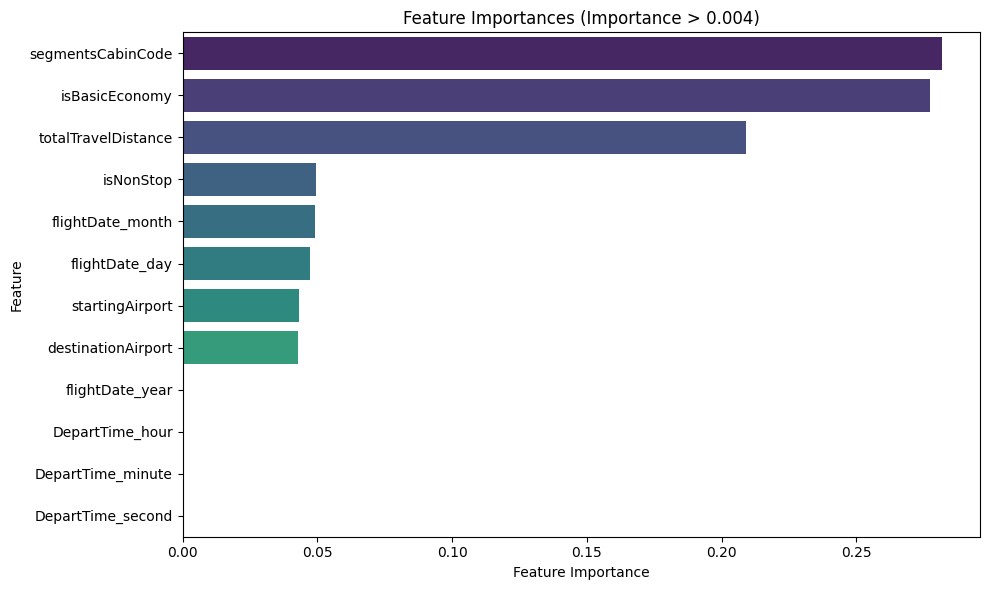

In [35]:
import seaborn as sns
# Create a colorful bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feat_imp_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Importance > 0.004)')
plt.tight_layout()
plt.show()

According to the feature importance analysis, `segmentsCabinCode` and `isBasicEconomy` have the most predictive power, each of which contributes significantly to the model's performance.`totalTravelDistance` is also important. 

In comparison, factors such as `flightDate_year,` `DepartTime_hour,` `DepartTime_minute,` and `DepartTime_second` have no effect on predicting airline ticket prices.

## Adaboost 


AdaBoostRegressor is an ensemble learning strategy that combines the predictions of numerous weak learners (often decision trees) to construct a stronger, more accurate predictive model. This ensemble strategy frequently outperforms individual models and can handle complex data interactions.

In [32]:
from sklearn.ensemble import AdaBoostRegressor
# Create an AdaBoostRegressor with DecisionTree as the base estimator
ada_boost_model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2), n_estimators=50, random_state=42)

# Train the model on the training data
ada_boost_model.fit(X_train, y_train)

# Model evaluation for training set
y_train_preds_ada = ada_boost_model.predict(X_train)

# Model evaluation for validation set
y_val_preds_ada = ada_boost_model.predict(X_val)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [33]:
print_regressor_scores(y_preds=y_train_preds_ada, y_actuals=y_train, set_name='Training')

MSE Training: 0.6438086013885033
MAE Training: 0.5989128252886454
R2_score Training: 0.356748


In [34]:
print_regressor_scores(y_preds=y_val_preds_ada, y_actuals=y_val, set_name='Validation')

MSE Validation: 0.6420047543249067
MAE Validation: 0.598884721128226
R2_score Validation: 0.355501


In [40]:
# Calculate MSE and MAE for the training set
mse_train_ada = mean_squared_error(y_train, y_train_preds_ada)
mae_train_ada = mean_absolute_error(y_train, y_train_preds_ada)

# Calculate MSE and MAE for the validation set
mse_val_ada = mean_squared_error(y_val, y_val_preds_ada)
mae_val_ada = mean_absolute_error(y_val, y_val_preds_ada)

However, the XGBoost with params n_estimators=300,   max_depth=5,learning_rate=0.2   are the best model in this experiment

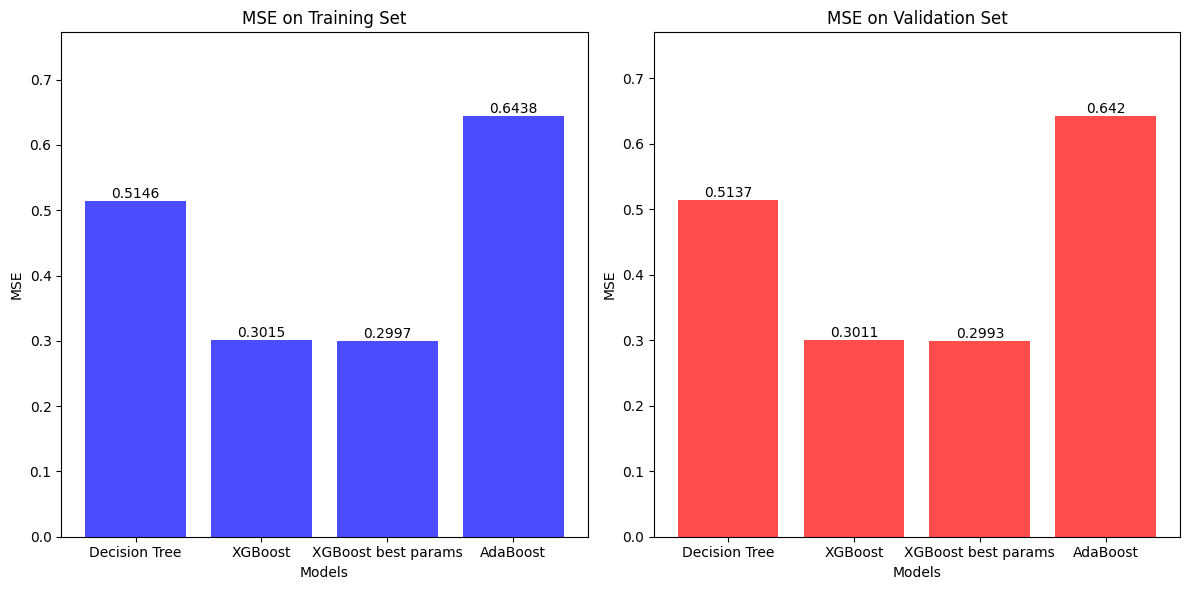

In [50]:
import matplotlib.pyplot as plt

# Define the models and corresponding MSE and MAE values
models = ["Decision Tree", "XGBoost", "XGBoost best params", "AdaBoost"]
mse_train_values = [mse_train_tree, mse_train_xgb, mse_train_xgb01, mse_train_ada]
mae_train_values = [mae_train_tree, mae_train_xgb, mae_train_xgb01, mae_train_ada]
mse_val_values = [mse_val_tree, mse_val_xgb, mse_val_xgb01, mse_val_ada]
mae_val_values = [mae_val_tree, mae_val_xgb, mae_val_xgb01, mae_val_ada]

# Create subplots for training and validation sets
plt.figure(figsize=(12, 6))

# Plot MSE for training set
plt.subplot(1, 2, 1)
bars = plt.bar(models, mse_train_values, color='b', alpha=0.7)
plt.title('MSE on Training Set')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(0, max(mse_train_values) * 1.2)

# Add values on top of the bars for training set
for bar, value in zip(bars, mse_train_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 4), ha='center', va='bottom')

# Plot MSE for validation set
plt.subplot(1, 2, 2)
bars = plt.bar(models, mse_val_values, color='r', alpha=0.7)
plt.title('MSE on Validation Set')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.ylim(0, max(mse_val_values) * 1.2)

# Add values on top of the bars for validation set
for bar, value in zip(bars, mse_val_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 4), ha='center', va='bottom')

plt.tight_layout()  # Ensures the subplots do not overlap

# Show the plot
plt.show()


The evaluation of Mean Squared Error (MSE) scores reveals that the model performance differs significantly. On the training set, the MSE score of the XGBoost model with optimised parameters (0.2997) marginally outperforms that of the default XGBoost configuration (0.3015). This distinction emphasises the tuned XGBoost model's improved predictive capability. Furthermore, when compared to the Decision Tree (MSE: 0.5146) and AdaBoost (MSE: 0.6438) models, XGBoost outperforms both.

Similar trends can be seen in the validation set, where the MSE of the optimised XGBoost (0.2993) remains marginally higher than that of the default XGBoost (0.3011). XGBoost outperforms the Decision Tree (MSE: 0.5137) and AdaBoost (MSE: 0.642) models in this context.

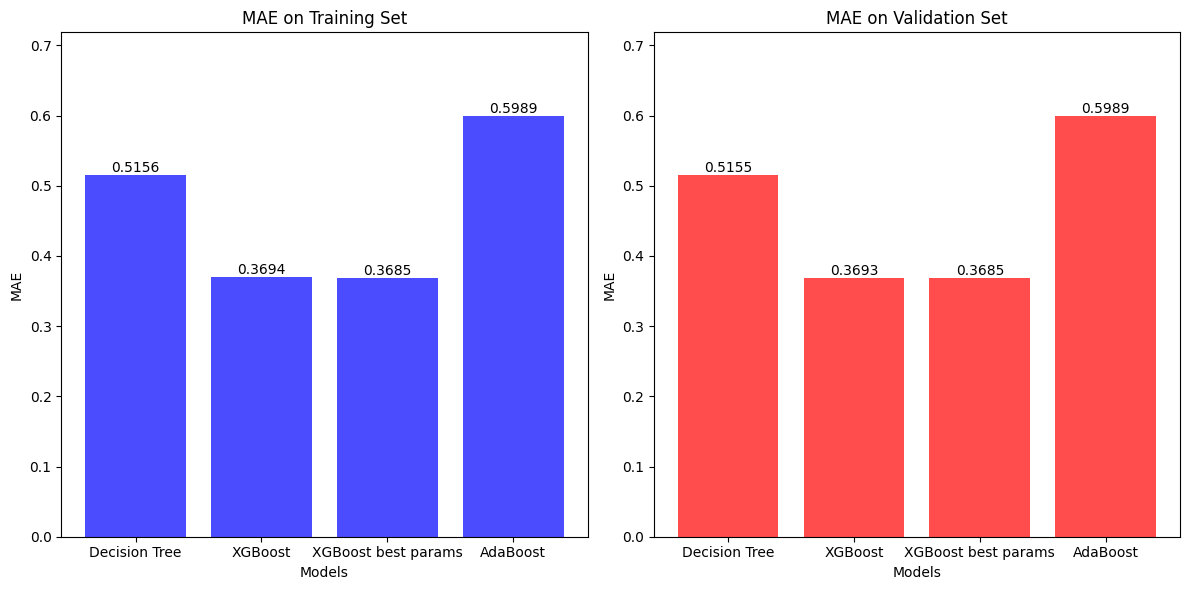

In [49]:
# Create subplots for training and validation sets
plt.figure(figsize=(12, 6))

# Plot MAE for training set
plt.subplot(1, 2, 1)
bars = plt.bar(models, mae_train_values, color='b', alpha=0.7)
plt.title('MAE on Training Set')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.ylim(0, max(mae_train_values) * 1.2)

# Add values on top of the bars for training set
for bar, value in zip(bars, mae_train_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 4), ha='center', va='bottom')

# Plot MAE for validation set
plt.subplot(1, 2, 2)
bars = plt.bar(models, mae_val_values, color='r', alpha=0.7)
plt.title('MAE on Validation Set')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.ylim(0, max(mae_val_values) * 1.2)

# Add values on top of the bars for validation set
for bar, value in zip(bars, mae_val_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 4), ha='center', va='bottom')

plt.tight_layout()  # Ensures the subplots do not overlap

# Show the plot
plt.show()

The evaluation of MAE scores reveals that the model performance differs significantly. On the training set, the MAE score of the XGBoost model with optimised parameters (0.3685) marginally outperforms that of the default XGBoost configuration (0.3694). This distinction emphasises the tuned XGBoost model's improved predictive capability. Furthermore, when compared to the Decision Tree (MAE: 0.5156) and AdaBoost (MAE: 0.5989) models, XGBoost outperforms both.

Similar trends can be seen in the validation set, where the MAE of the optimised XGBoost (0.3685) remains marginally higher than that of the default XGBoost (0.3693). XGBoost outperforms the Decision Tree (MAE: 0.5155) and AdaBoost (MAE: 0.5989) models in this context.

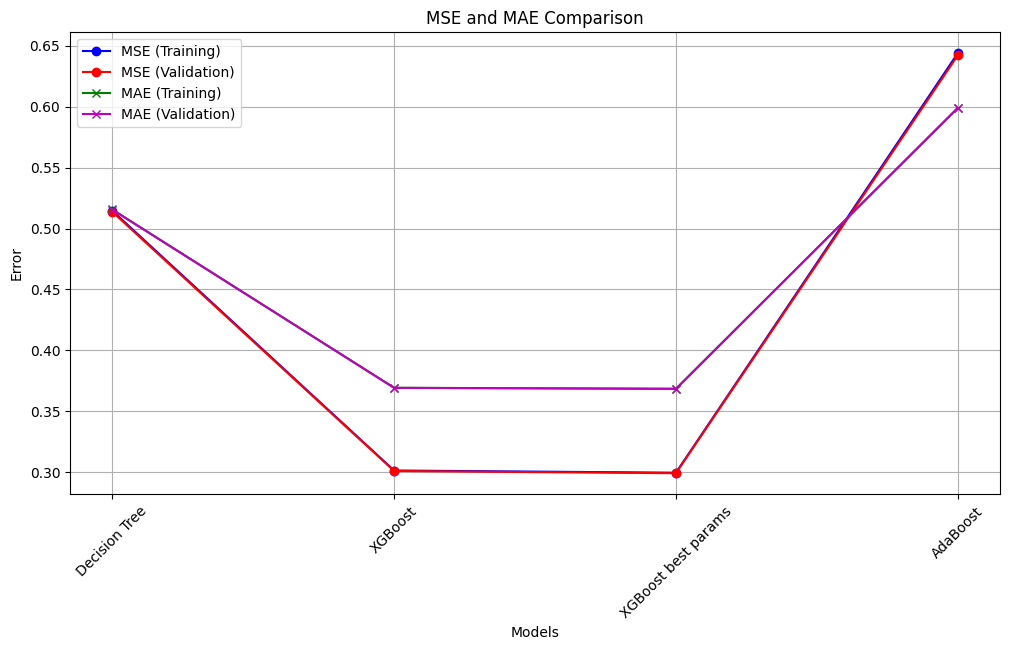

In [53]:
import numpy as np
# Create an array of indices for the models
x = np.arange(len(models))

# Create subplots for training and validation sets
plt.figure(figsize=(12, 6))

# Plot MSE for training set
plt.plot(x, mse_train_values, marker='o', label='MSE (Training)', color='b')

# Plot MSE for validation set
plt.plot(x, mse_val_values, marker='o', label='MSE (Validation)', color='r')

# Plot MAE for training set
plt.plot(x, mae_train_values, marker='x', label='MAE (Training)', color='g')

# Plot MAE for validation set
plt.plot(x, mae_val_values, marker='x', label='MAE (Validation)', color='m')

# Set the x-axis labels to model names
plt.xticks(x, models, rotation=45)

# # Add values on top of the data points
# for i in range(len(models)):
#     plt.text(x[i], mse_train_values[i], f"{mse_train_values[i]:.4f}", ha='center', va='bottom', color='b')
#     plt.text(x[i], mse_val_values[i], f"{mse_val_values[i]:.4f}", ha='center', va='bottom', color='r')
#     plt.text(x[i], mae_train_values[i], f"{mae_train_values[i]:.4f}", ha='center', va='top', color='g')
#     plt.text(x[i], mae_val_values[i], f"{mae_val_values[i]:.4f}", ha='center', va='top', color='m')

plt.title('MSE and MAE Comparison')
plt.xlabel('Models')
plt.ylabel('Error')
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [55]:
import plotly.express as px
# Create a DataFrame for the data
data = pd.DataFrame({
    'Model': models * 2,
    'Error Type': ['MSE'] * len(models) + ['MAE'] * len(models),
    'Value': mse_train_values + mae_train_values
})

# Create a line chart using Plotly
fig = px.line(data, x='Model', y='Value', color='Error Type',
              labels={'Value': 'Error Value'},
              title='MSE and MAE Comparison for Different Models (Training Set)')

# Show the plot
fig.show()

The consistent superior performance of XGBoost across both training and validation sets reinforces its position as the most effective model for the given task, making it the prefered choice for further analysis and implementation.

## Results in deploy app 

In [56]:
# Create input data for prediction (similar to your previous code)
input_data = {
        'totalTravelDistance': [1569.618],
        'isNonStop': [True],
        'isBasicEconomy': [False],
        'startingAirport': [1],
        'destinationAirport': [3],
        'segmentsCabinCode': [28],
        'flightDate_day': [11],
        'flightDate_month': [11],
        'flightDate_year': [2023],
        'DepartTime_hour': [10],
        'DepartTime_minute': [30],
        'DepartTime_second': [0],
    }

# Create a DataFrame with the input data
input_df = pd.DataFrame(input_data)

# Use the loaded models to make predictions
total_fare = bestparam_xgb_model.predict(input_df)
   
print(f'The total fare for your trip with XGBoost prediction: ${total_fare[0]:.2f}')

The total fare for your trip with XGBoost prediction: $10.46


## Limitation

The discrepancy in the prediction of the total fare with XGBoost may be attributed to various factors. 

Here are some possible reasons for the prediction result:
1. **Limited Data Range**: The primary cause of the XGBoost prediction divergence is due to the training data's temporal constraints. Forecasting airfare prices for a date in 2023 becomes inherently difficult with a training dataset spanning the period from April 2022 to July 2022. Inadequate historical data within the desired timeframe can have a significant impact on prediction accuracy. To address this, the training dataset must be supplemented with historical data that extends into 2023, allowing the model to better understand evolving pricing trends.

2. **External Factors**: Flight prices are highly volatile due to a variety of external factors such as seasonality, holidays, economic conditions, and demand fluctuations. The predictive model's accuracy may suffer if these extraneous determinants are not taken into account. A comprehensive approach includes features that capture the subtleties of seasonality and other external factors. As a result, the model can adapt to the ever-changing landscape of airfare pricing and provide more accurate predictions for future dates.

3. **Feature Importance**: The feature "flightDate_year" is important in predictions, but its weighting within the model may not be proportional to its importance. If it is fixed at 2023, the model's predictive capability may be compromised. To address this issue, feature importance must be reevaluated, and the model's focus on the "flightDate_year" feature must be adjusted.

To enhance prediction accuracy for future dates, we recommend the following actions:
1. **Collect and integrate historical data spanning 2023 and beyond into the training dataset**, allowing the model to accommodate future scenarios.

2. **Add variables capable of capturing seasonality, holiday effects**, and other external influences on airfare prices to the feature set.

3. **Ensure meticulous feature engineering and preprocessing** to effectively harness the underlying complexities of the data.

4. **Reevaluate the model's feature importance** and overall performance to fine-tune its parameters and align them with the problem's specific requirements.

Given the airline industry's multifaceted and dynamic nature, it is critical to recognise the inherent complexity of accurately predicting airfare prices. To produce reliable predictions, effective solutions frequently necessitate a combination of domain expertise and data-driven refinement.

## Reference
So, A. (2023, August).36120_AdvMLA-Lab1_Exercise2-Solutions.ipynb. https://colab.research.google.com/drive/15OZMUMwUBoAmtrfuzJaEhF1Ta8XkCmQZ?authuser=2#scrollTo=Pw_LqGuGC9Oz

So, A. (2023, August).36120_AdvMLA-Lab2_Exercise1-Solutions.ipynb. https://colab.research.google.com/drive/15OZMUMwUBoAmtrfuzJaEhF1Ta8XkCmQZ?authuser=2#scrollTo=Pw_LqGuGC9Oz

So, A. (2023, August).36120_AdvMLA-Lab2_Exercise2-Solutions.ipynb. https://colab.research.google.com/drive/1HzN0kcWIFmApxJFDYQoiBZVurVZd9HJk?authuser=2

So, A. (2023, August).36120_AdvMLA-Lab2_Exercise3-Solutions.ipynb. https://colab.research.google.com/drive/1LzgqM0bRDNL9hf0GiE2t2xCzpamOvwAJ?authuser=2


***
**Name**: Wongwara Wijara

**Student id**: 14191732

**Email**: Wongwara.Wijara@student.uts.edu.au

**Subject**: 36120 Advanced Machine Learning Application - Spring 2023

**University**: University of Technology Sydney
***